In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
import warnings # biblioteca que permite tirar os avisos da celula do notebook


In [3]:
df = pd.read_csv('dados_produtos.csv')

In [31]:
warnings.filterwarnings('ignore') # ignora os warnings

In [4]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [6]:
df.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


<Axes: xlabel='product_name', ylabel='rating'>

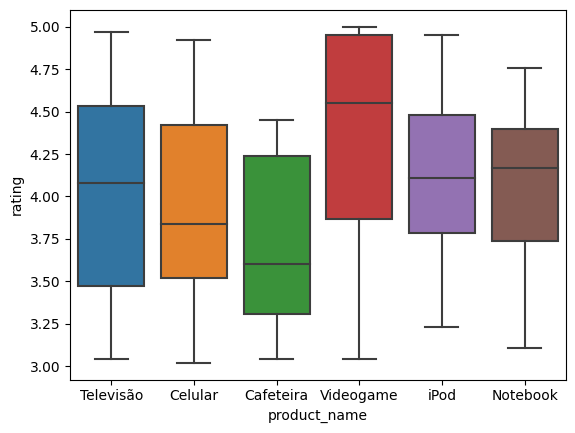

In [7]:
sns.boxplot(x= df['product_name'],y= df['rating'])

In [9]:
df.isnull().sum() # verifica se existe valores vazios na base de dados

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [10]:
df.isna().sum()

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [12]:
# selecionando apenas as colunas numericas do dataframe
col_n = df.select_dtypes(include=['number'])


In [14]:
# correlação
correlacao = col_n.corr()
correlacao

,rating,rating_count,purchased
rating,1.000000,0.051993,0.032637
rating_count,0.051993,1.000000,0.129694
purchased,0.032637,0.129694,1.000000


<Axes: >

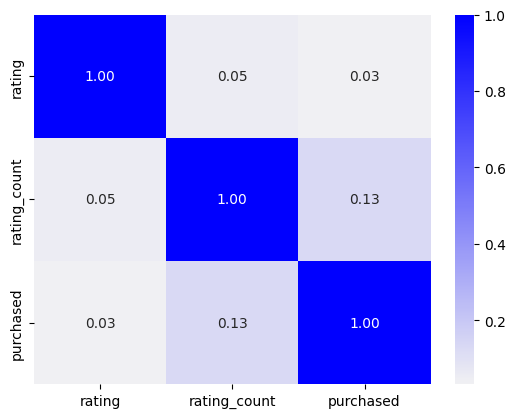

In [17]:
# plotando o gráfico da correlação
color = sns.color_palette('light:blue',as_cmap= True)
sns.heatmap(correlacao,cmap=color,fmt='.2f',annot= True)

In [20]:
# Plotagem da árvore de decisão



In [19]:
products

array(['Televisão', 'Celular', 'Cafeteira', 'Videogame', 'iPod',
       'Notebook'], dtype=object)


 -----  Árvore de decisão produto: Televisão ----- 

Avaliando o modelo de árvore de decisão
Acurácia: 0.5
Precision score: 1.0
Recall: 0.3333333333333333
F1-Score: 0.5

 -----  Árvore de decisão produto: Celular ----- 

Avaliando o modelo de árvore de decisão
Acurácia: 0.6
Precision score: 0.5
Recall: 1.0
F1-Score: 0.6666666666666666

 -----  Árvore de decisão produto: Cafeteira ----- 

Avaliando o modelo de árvore de decisão
Acurácia: 0.5
Precision score: 0.0
Recall: 0.0
F1-Score: 0.0

 -----  Árvore de decisão produto: Videogame ----- 

Avaliando o modelo de árvore de decisão
Acurácia: 1.0
Precision score: 1.0
Recall: 1.0
F1-Score: 1.0

 -----  Árvore de decisão produto: iPod ----- 

Avaliando o modelo de árvore de decisão
Acurácia: 0.5
Precision score: 0.5
Recall: 0.5
F1-Score: 0.5

 -----  Árvore de decisão produto: Notebook ----- 

Avaliando o modelo de árvore de decisão
Acurácia: 0.75
Precision score: 0.5
Recall: 1.0
F1-Score: 0.6666666666666666


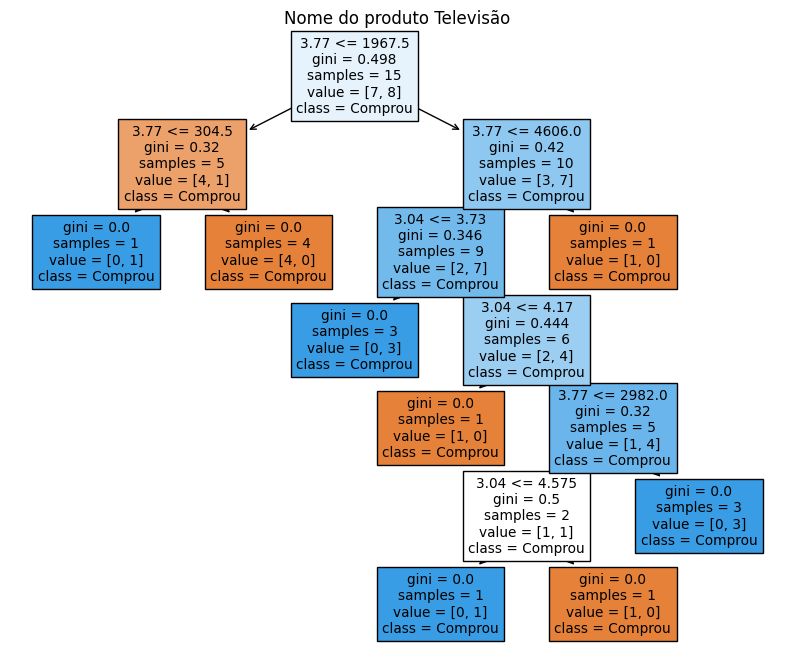

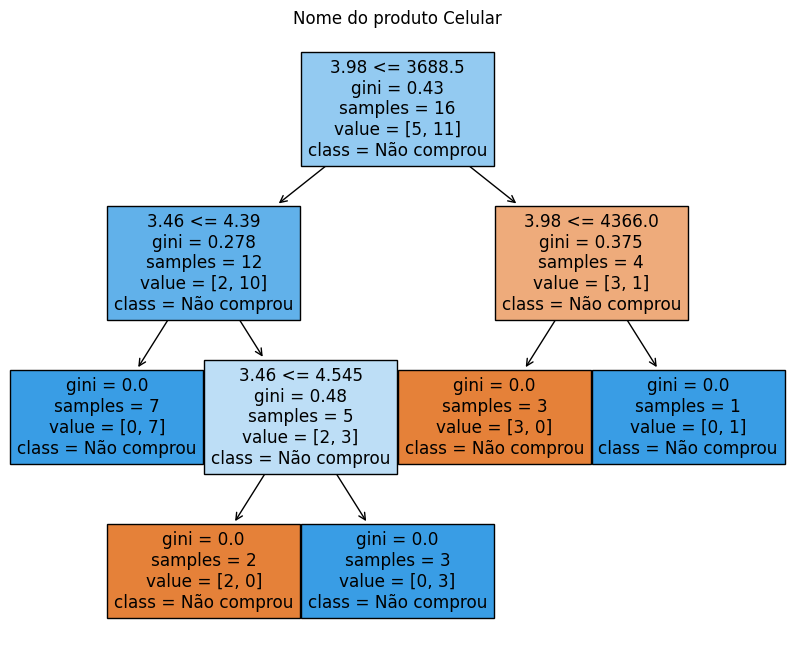

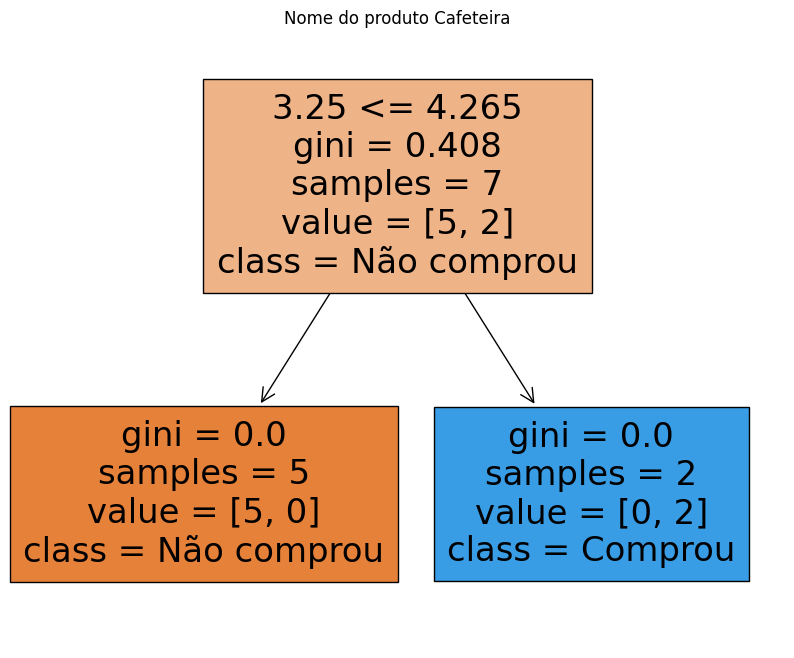

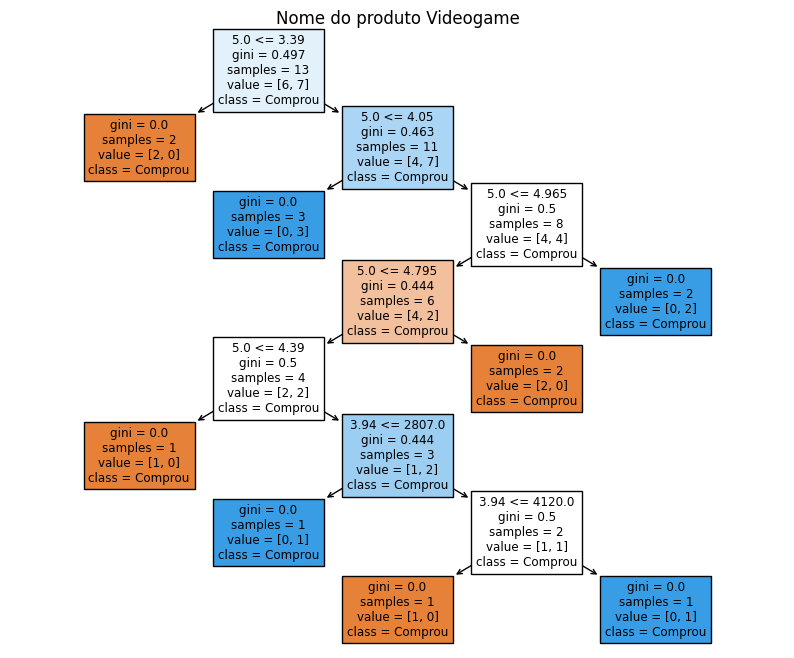

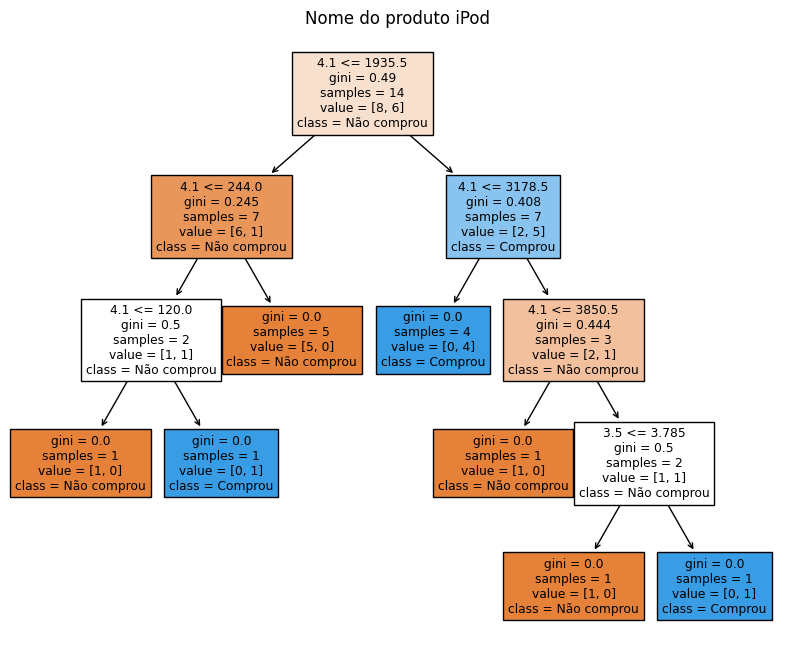

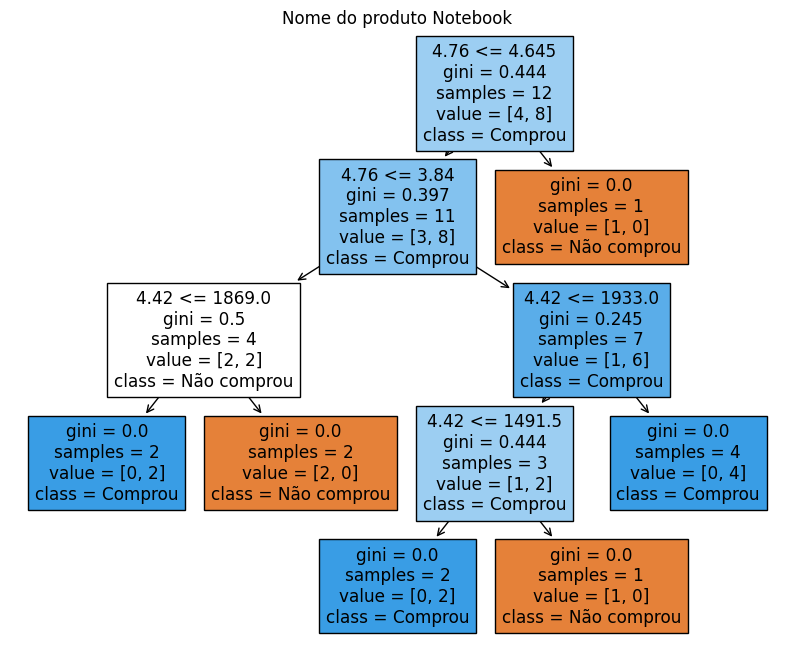

In [32]:
products = df['product_name'].unique() # unifica os produtos em uma lista
for product in products:
    
    product_df= df.loc[df['product_name'] == product]
    X = product_df.drop(['purchased','product_name'],axis=1)
    y= product_df['purchased']
    

# Dividindo os dados em treino e teste

    X_train,x_test, y_train,y_test = train_test_split(X,y,
                                                  test_size=0.2,
                                                  random_state=42)
    modelo = DecisionTreeClassifier() # cria o modelo de ML
    modelo.fit(X_train,y_train)
    ypred = modelo.predict(x_test)

    # avaliando o modelo de Machine Learning
    print(f'\n -----  Árvore de decisão produto: {product} ----- \n')
    print('Avaliando o modelo de árvore de decisão')
    print(f'Acurácia: {accuracy_score(y_test,ypred)}')
    print(f'Precision score: {precision_score(y_test,ypred)}')
    print(f'Recall: {recall_score(y_test,ypred)}')
    print(f'F1-Score: {f1_score(y_test,ypred)}')
    product_df['purchased']= product_df['purchased'].replace([1,0],
                                                         ['Comprou','Não comprou'])
    fig = plt.figure(figsize=(10,8))
    tree.plot_tree(modelo,feature_names=product_df['rating'].tolist(),
             class_names= product_df['purchased'].tolist(),filled=True  )


<Axes: >

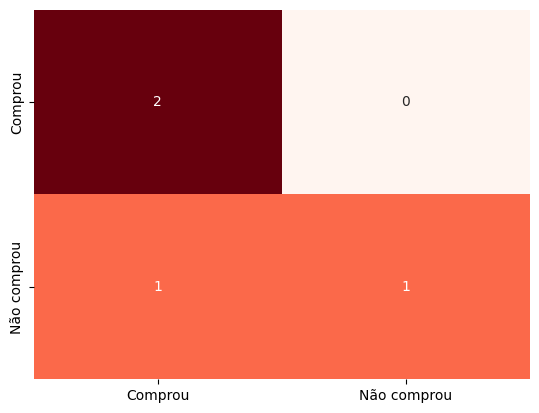

In [33]:
sns.heatmap(confusion_matrix(ypred,y_test),annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Comprou', 'Não comprou'], 
            yticklabels=['Comprou','Não comprou'])   

In [34]:
# Análises exploratória dos dados
# Calculando a nota média dos produtos
notasprodutos = df.groupby('product_name')['rating'].mean().reset_index()

In [35]:
notasprodutos

,product_name,rating
0,Cafeteira,3.747778
1,Celular,3.949524
2,Notebook,4.074375
3,Televisão,4.002632
4,Videogame,4.314118
5,iPod,4.135556


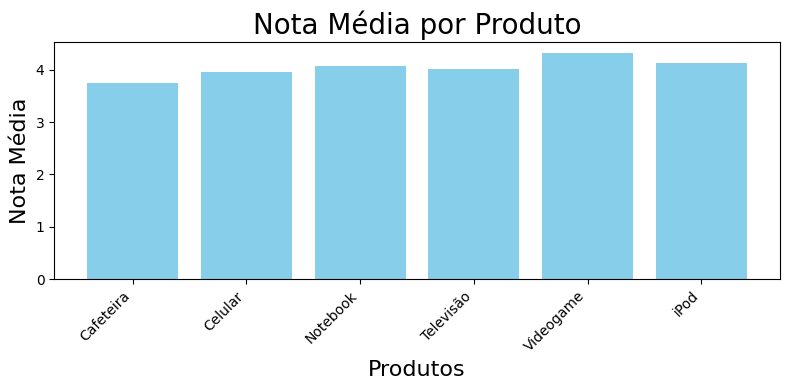

In [36]:
# Renomear colunas 
notasprodutos.columns = ['Produto', 'Nota Média']
# Criar gráfico
plt.figure(figsize=(8, 4))
plt.bar(notasprodutos['Produto'], notasprodutos['Nota Média'], color='skyblue')
plt.xlabel('Produtos', fontsize=16)
plt.ylabel('Nota Média', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotaciona as labels para melhor visualização
plt.title("Nota Média por Produto", fontsize=20)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

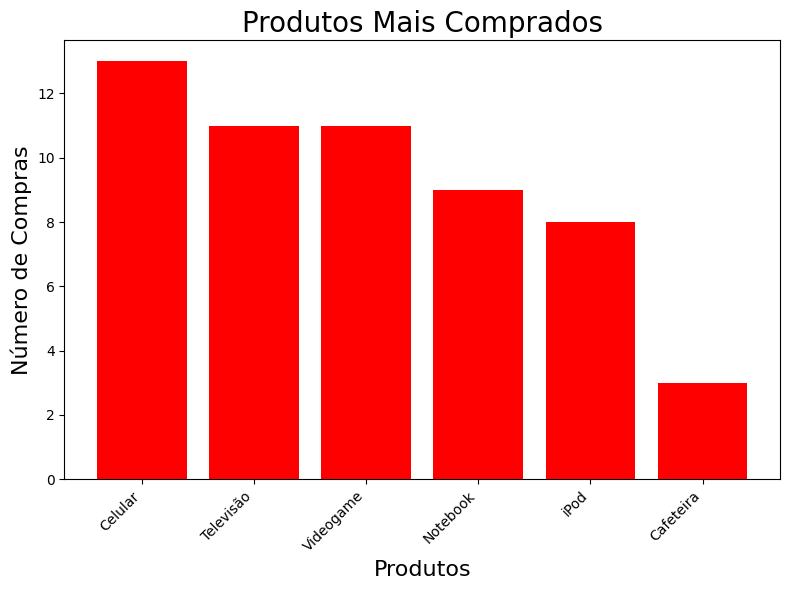

In [37]:
# Calcular a contagem de produtos comprados
produtos_comprados = df[df['purchased'] == 1]
contagem_produtos = produtos_comprados['product_name'].value_counts().reset_index()

# Renomear colunas
contagem_produtos.columns = ['Produto', 'Contagem']

# Criar gráfico
plt.figure(figsize=(8, 6))
plt.bar(contagem_produtos['Produto'], contagem_produtos['Contagem'], color='red')
plt.xlabel('Produtos', fontsize=16)
plt.ylabel('Número de Compras', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotaciona as labels para melhor visualização
plt.title("Produtos Mais Comprados", fontsize=20)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

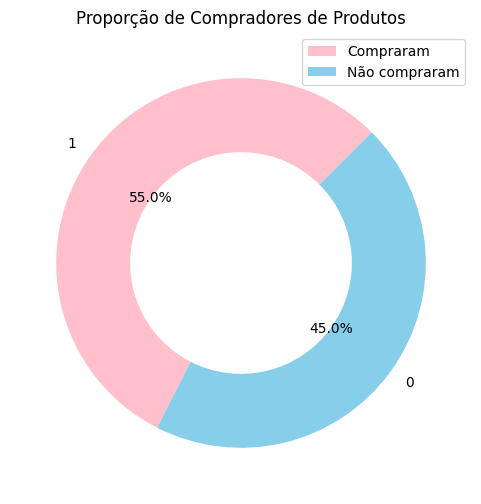

In [38]:
# Calcular a proporção de compradores
proporcao_compradores = df['purchased'].value_counts(normalize=True)

# Cores para o gráfico de pizza
cores_invertidas = ['pink', 'skyblue']

# Visualização
plt.figure(figsize=(6, 6))
plt.pie(proporcao_compradores, labels=proporcao_compradores.index, autopct='%1.1f%%',
        startangle=45, colors=cores_invertidas, wedgeprops=dict(width=0.4))
plt.title('Proporção de Compradores de Produtos')
plt.legend(['Compraram', 'Não compraram'], loc='upper right')
plt.show()